In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_column',None)
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf


In [2]:
df=pd.read_csv('waterQuality1.csv')

In [3]:
df

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,0.000,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,0.650,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,0.003,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,0.710,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,0.001,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,0.000,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1
7995,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,0.000,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1
7996,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,0.000,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1
7997,0.01,10,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,0.000,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [5]:
df.describe()

,aluminium,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
count,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000
mean,0.666158,0.161445,1.567715,0.042806,2.176831,0.247226,0.805857,0.771565,0.319665,0.328583,0.099450,9.818822,1.329961,0.005194,16.460299,2.920548,0.049685,0.147781,0.044673
std,1.265145,0.252590,1.216091,0.036049,2.567027,0.270640,0.653539,0.435373,0.329485,0.378096,0.058172,5.541331,0.573219,0.002967,17.687474,2.323009,0.028770,0.143551,0.026904
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.405000,0.000000,0.002000,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000
50%,0.070000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,0.008000,0.102000,9.930000,1.420000,0.005000,7.740000,2.410000,0.050000,0.080000,0.050000
75%,0.280000,0.100000,2.480000,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,0.700000,0.151000,14.610000,1.760000,0.008000,29.480000,4.670000,0.070000,0.240000,0.070000
max,5.050000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,1.000000,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000


In [6]:
df.isnull().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

In [7]:
df.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,0.000,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,0.650,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,0.003,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,0.710,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,0.001,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [8]:
df.sample()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
2351,0.09,28.92,0.03,1.25,0.002,6.29,0.35,1.02,1.24,0.44,0.001,0.197,10.49,1.54,0.002,46.36,7.37,0.08,0.36,0.09,0


In [9]:
df.is_safe.value_counts()

0        7084
1         912
#NUM!       3
Name: is_safe, dtype: int64

In [10]:
df.is_safe=df.is_safe.replace({'#NUM!':'1'})

In [11]:
#df.is_safe = df.is_safe.map({'#NUM!':3,0:1,1:2})

In [12]:
#df.ammonia=df.ammonia.replace({})

In [13]:
df.ammonia.unique()

array(['9.08', '21.16', '14.02', ..., '2.78', '27.12', '10'], dtype=object)

In [14]:
df.loc[[7551,7568,7890],'ammonia']

7551    #NUM!
7568    #NUM!
7890    #NUM!
Name: ammonia, dtype: object

In [15]:
df.drop([7551,7568,7890],axis=0,inplace=True)

In [16]:
df.ammonia.value_counts()

0.12     13
0.17     13
0.37     13
13.74    12
0.41     11
         ..
6.78      1
16.4      1
24.46     1
20.49     1
10        1
Name: ammonia, Length: 2563, dtype: int64

# EDA

In [17]:
df.is_safe.value_counts() 

0    7084
1     912
Name: is_safe, dtype: int64

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'is safe')

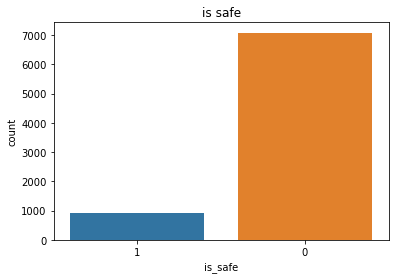

In [18]:
sns.countplot(df.is_safe)
plt.title('is safe')

In [19]:
df.aluminium.unique()

array([1.65, 2.32, 1.01, 1.36, 0.92, 0.94, 2.36, 3.93, 0.6 , 0.22, 3.27,
       1.35, 1.88, 4.93, 2.89, 0.61, 3.47, 2.11, 4.88, 4.12, 0.68, 1.15,
       0.27, 4.32, 3.31, 1.82, 3.42, 4.41, 4.57, 1.69, 1.87, 2.71, 1.63,
       0.01, 4.49, 3.52, 4.35, 2.51, 2.34, 1.71, 3.45, 3.37, 3.13, 0.29,
       1.51, 1.09, 2.68, 0.3 , 0.23, 2.55, 0.86, 0.24, 3.63, 3.26, 0.42,
       0.77, 0.58, 3.82, 2.78, 3.62, 3.88, 4.64, 2.25, 0.54, 4.62, 2.5 ,
       3.08, 3.03, 2.85, 1.38, 2.73, 3.02, 1.96, 2.35, 2.45, 2.67, 1.12,
       3.3 , 0.43, 1.19, 0.85, 0.5 , 4.75, 1.89, 3.75, 3.32, 1.75, 2.66,
       2.76, 2.63, 0.04, 0.88, 2.22, 4.91, 4.8 , 0.47, 1.62, 0.09, 4.66,
       2.74, 1.79, 4.15, 3.78, 2.91, 4.3 , 3.24, 3.53, 3.04, 2.21, 2.47,
       1.92, 1.22, 2.12, 4.19, 4.21, 4.07, 2.56, 3.55, 3.94, 0.8 , 2.59,
       3.9 , 3.15, 0.18, 3.86, 1.25, 2.29, 0.07, 4.18, 4.34, 2.39, 0.9 ,
       0.89, 2.4 , 3.69, 4.71, 3.36, 4.46, 4.5 , 0.57, 2.69, 2.17, 1.32,
       5.  , 2.6 , 0.35, 3.83, 2.9 , 1.56, 2.23, 3.

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'aluminium')

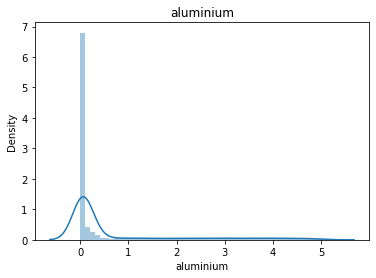

In [20]:
sns.distplot(df['aluminium'])
plt.title('aluminium')

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'aluminium')

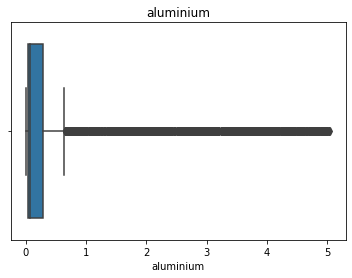

In [21]:
sns.boxplot(df.aluminium)
plt.title('aluminium')

In [22]:
q1=df.aluminium.quantile(0.25)
q3=df.aluminium.quantile(0.75)
iqr=q3-q1
upper_bond_aluminium=q3+(1.5*iqr)
lower_bond_aluminium=q1-(1.5*iqr)
df.aluminium=np.where(df.aluminium>upper_bond_aluminium,upper_bond_aluminium, np.where(df.aluminium <lower_bond_aluminium, lower_bond_aluminium, df.aluminium))

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='aluminium'>

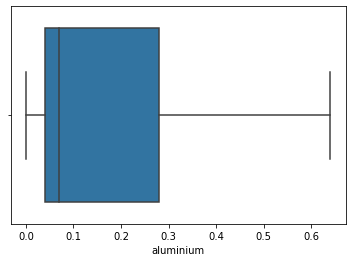

In [23]:
sns.boxplot(df.aluminium)

In [24]:
annova=ols('aluminium ~is_safe',data=df).fit()
an=sm.stats.anova_lm(annova)
print(an.round(decimals=5))

              df     sum_sq   mean_sq           F  PR(>F)
is_safe      1.0   77.16533  77.16533  1542.53114     0.0
Residual  7994.0  399.90093   0.05003         NaN     NaN


In [25]:
df.ammonia.value_counts()

0.12     13
0.17     13
0.37     13
13.74    12
0.41     11
         ..
6.78      1
16.4      1
24.46     1
20.49     1
10        1
Name: ammonia, Length: 2563, dtype: int64

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'ammonia')

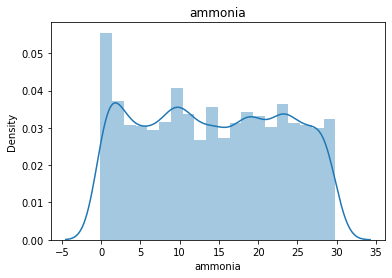

In [26]:
sns.distplot(df.ammonia)
plt.title('ammonia')

Text(0.5, 1.0, 'ammonia')

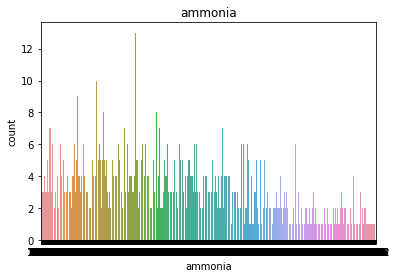

In [27]:
sns.countplot(x='ammonia',data=df)
plt.title('ammonia')

In [28]:
#df=df.drop(['ammonia'],axis=1,inplace=True)

In [29]:
#annova=ols('ammonia ~is_safe',data=df).fit()
#an=sm.stats.anova_lm(annova)
#print(an.round(decimals=5))

In [30]:
df.arsenic.value_counts()

0.04    858
0.03    797
0.02    797
0.01    788
0.05    624
       ... 
1.03     10
0.55     10
1.01      7
1.04      2
1.05      2
Name: arsenic, Length: 107, dtype: int64

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'arsenic')

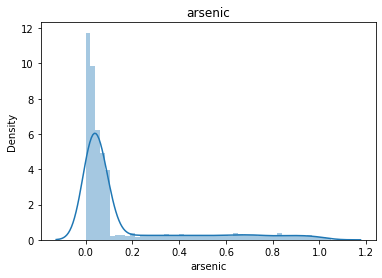

In [31]:
sns.distplot(df.arsenic)
plt.title('arsenic')

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'arsenic')

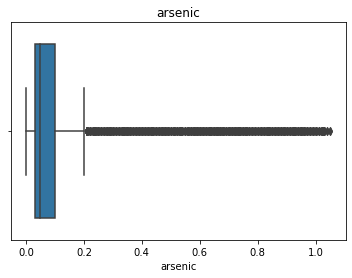

In [32]:
sns.boxplot(df.arsenic)
plt.title('arsenic')

In [33]:
q1=df.arsenic.quantile(0.25)
q3=df.arsenic.quantile(0.75)
iqr=q3-q1
upper_bond_arsenic=q3+(1.5*iqr)
lower_bond_arsenic=q1-(1.5*iqr)
df.arsenic=np.where(df.arsenic>upper_bond_arsenic,upper_bond_arsenic, np.where(df.arsenic <lower_bond_arsenic, lower_bond_arsenic, df.arsenic))

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='arsenic'>

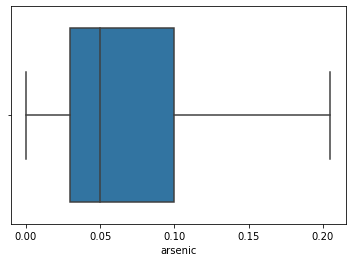

In [34]:
sns.boxplot(df.arsenic)

In [35]:
annova=ols('arsenic ~is_safe ',data=df).fit()
an=sm.stats.anova_lm(annova)
print(an.round(decimals=5))

              df    sum_sq  mean_sq          F  PR(>F)
is_safe      1.0   1.10276  1.10276  224.95385     0.0
Residual  7994.0  39.18793  0.00490        NaN     NaN


In [36]:
df.barium.value_counts()

0.23    50
0.38    50
0.57    49
0.77    49
0.96    46
        ..
4.82     1
4.83     1
4.52     1
4.01     1
4.77     1
Name: barium, Length: 480, dtype: int64

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'barium')

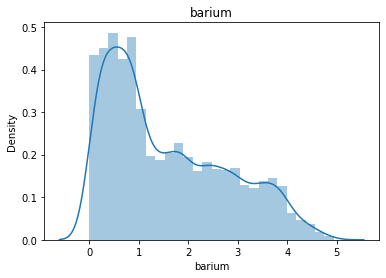

In [37]:
sns.distplot(df.barium)
plt.title('barium')

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'barium')

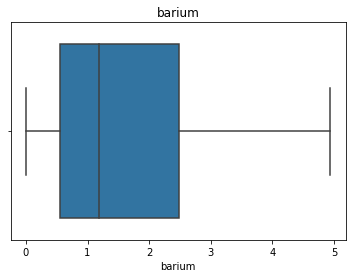

In [38]:
sns.boxplot(df.barium)
plt.title('barium')

In [39]:
annova=ols('barium ~is_safe',data=df).fit()
an=sm.stats.anova_lm(annova)
print(an.round(decimals=5))

              df       sum_sq   mean_sq        F  PR(>F)
is_safe      1.0     97.62902  97.62902  66.5419     0.0
Residual  7994.0  11728.64594   1.46718      NaN     NaN


In [40]:
df.cadmium.value_counts()

0.090    588
0.060    573
0.040    562
0.020    559
0.050    558
0.070    554
0.010    553
0.030    536
0.080    532
0.001    358
0.100    347
0.008    242
0.005    240
0.000    236
0.002    226
0.006    220
0.003    214
0.007    206
0.004    204
0.120    175
0.110    161
0.009     90
0.130     62
Name: cadmium, dtype: int64

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'cadmium')

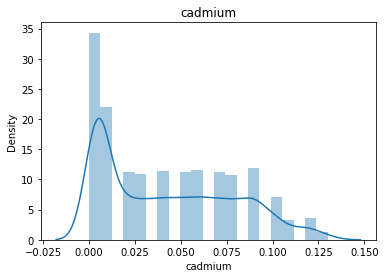

In [41]:
sns.distplot(df.cadmium)
plt.title('cadmium')

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'cadmium')

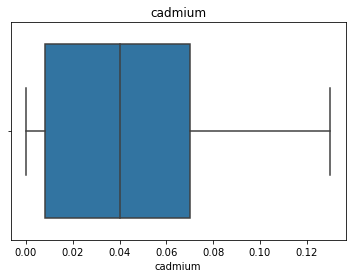

In [42]:
sns.boxplot(df.cadmium)
plt.title('cadmium')

In [43]:
annova=ols('cadmium ~is_safe',data=df).fit()
an=sm.stats.anova_lm(annova)
print(an.round(decimals=5))

              df   sum_sq  mean_sq          F  PR(>F)
is_safe      1.0  0.68109  0.68109  560.79571     0.0
Residual  7994.0  9.70883  0.00121        NaN     NaN


In [44]:
df.chloramine.value_counts()

0.09    223
0.01    222
0.02    218
0.04    216
0.05    215
       ... 
5.91      1
8.34      1
5.77      1
8.42      1
3.94      1
Name: chloramine, Length: 812, dtype: int64

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'chloramine')

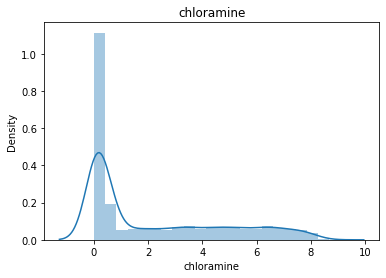

In [45]:
sns.distplot(df.chloramine)
plt.title('chloramine')

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'chloramine')

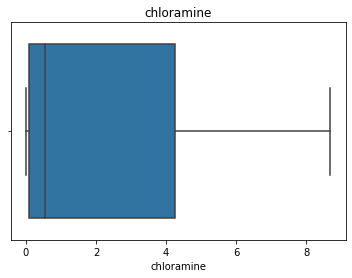

In [46]:
sns.boxplot(df.chloramine)
plt.title('chloramine')

In [47]:
annova=ols('chloramine ~is_safe',data=df).fit()
an=sm.stats.anova_lm(annova)
print(an.round(decimals=5))

              df       sum_sq     mean_sq          F  PR(>F)
is_safe      1.0   1836.75041  1836.75041  288.72352     0.0
Residual  7994.0  50854.81990     6.36162        NaN     NaN


In [48]:
df.chromium.value_counts()

0.04    495
0.06    483
0.08    480
0.03    461
0.07    457
       ... 
0.44     24
0.22     20
0.81     20
0.90     12
0.75     12
Name: chromium, Length: 91, dtype: int64

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'chromium')

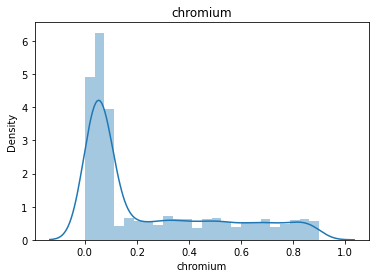

In [49]:
sns.distplot(df.chromium)
plt.title('chromium')

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'chromium')

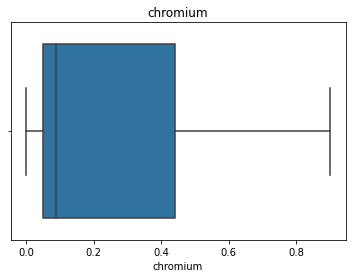

In [50]:
sns.boxplot(df.chromium)
plt.title('chromium')

In [51]:
annova=ols('chromium ~is_safe',data=df).fit()
an=sm.stats.anova_lm(annova)
print(an.round(decimals=5))

              df     sum_sq   mean_sq          F  PR(>F)
is_safe      1.0   19.46619  19.46619  274.81898     0.0
Residual  7994.0  566.23721   0.07083        NaN     NaN


In [52]:
df.copper.value_counts()

0.05    241
0.04    239
0.08    228
0.02    216
0.07    206
       ... 
1.70      7
0.32      7
2.00      6
0.45      6
0.64      5
Name: copper, Length: 201, dtype: int64

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'copper')

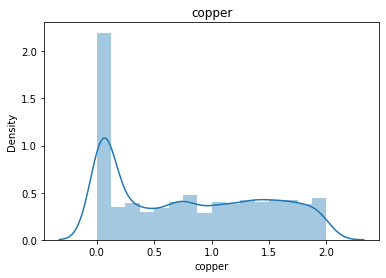

In [53]:
sns.distplot(df.copper)
plt.title('copper')

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'copper')

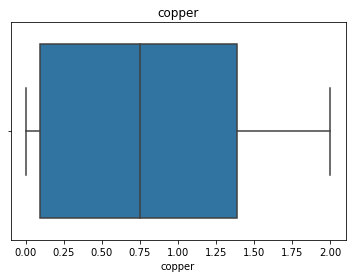

In [54]:
sns.boxplot(df.copper)
plt.title('copper')

In [55]:
annova=ols('copper ~is_safe',data=df).fit()
an=sm.stats.anova_lm(annova)
print(an.round(decimals=5))

              df      sum_sq  mean_sq        F   PR(>F)
is_safe      1.0     2.97189  2.97189  6.96208  0.00834
Residual  7994.0  3412.38034  0.42687      NaN      NaN


In [56]:
df.flouride.value_counts()

1.43    128
0.63    104
0.33     96
0.61     95
1.39     88
       ... 
0.18     16
1.22     16
1.11     16
0.39     16
0.60      8
Name: flouride, Length: 151, dtype: int64

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'flouride')

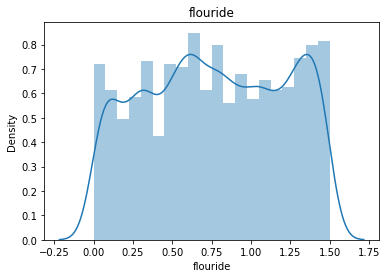

In [57]:
sns.distplot(df.flouride)
plt.title('flouride')

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'flouride')

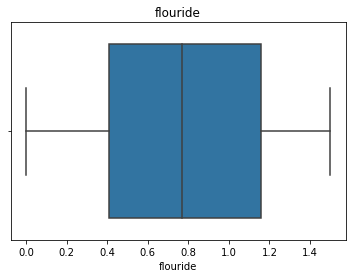

In [58]:
sns.boxplot(df.flouride)
plt.title('flouride')

In [59]:
annova=ols('flouride ~is_safe',data=df).fit()
an=sm.stats.anova_lm(annova)
print(an.round(decimals=5))

              df      sum_sq  mean_sq      F   PR(>F)
is_safe      1.0     0.06504  0.06504  0.343  0.55812
Residual  7994.0  1515.73530  0.18961    NaN      NaN


In [60]:
df.drop(['flouride'],axis=1,inplace=True)

In [61]:
df.bacteria.value_counts()

0.00    2793
0.13      84
0.75      84
0.89      83
0.74      80
        ... 
0.90      26
0.12      25
0.47      21
0.81      21
0.88      21
Name: bacteria, Length: 101, dtype: int64

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'bacteria')

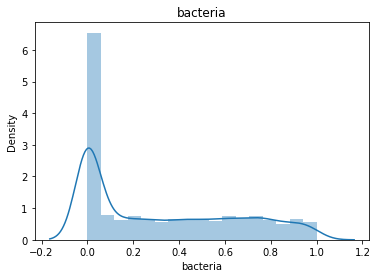

In [62]:
sns.distplot(df.bacteria)
plt.title('bacteria')

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'bacteria')

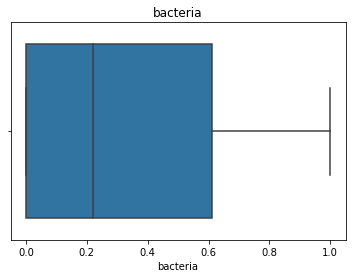

In [63]:
sns.boxplot(df.bacteria)
plt.title('bacteria')

In [64]:
annova=ols('bacteria ~is_safe',data=df).fit()
an=sm.stats.anova_lm(annova)
print(an.round(decimals=5))

              df     sum_sq  mean_sq        F   PR(>F)
is_safe      1.0    0.42307  0.42307  3.89828  0.04837
Residual  7994.0  867.57817  0.10853      NaN      NaN


In [65]:
df.viruses.value_counts()

0.000    1303
0.001     453
0.008     420
0.002     408
0.005     383
         ... 
0.860      42
0.710      41
0.900      34
0.810      25
0.880      25
Name: viruses, Length: 61, dtype: int64

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'viruses')

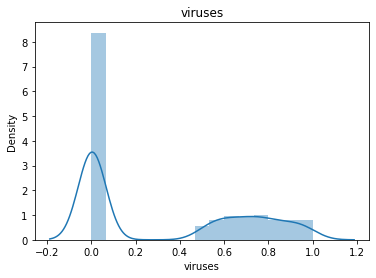

In [66]:
sns.distplot(df.viruses)
plt.title('viruses')

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'viruses')

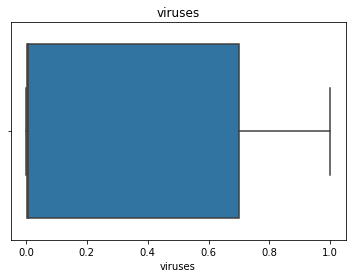

In [67]:
sns.boxplot(df.viruses)
plt.title('viruses')

In [68]:
annova=ols('viruses ~is_safe',data=df).fit()
an=sm.stats.anova_lm(annova)
print(an.round(decimals=5))

              df      sum_sq   mean_sq         F  PR(>F)
is_safe      1.0    10.76371  10.76371  75.99284     0.0
Residual  7994.0  1132.27897   0.14164       NaN     NaN


In [69]:
df.lead.value_counts()

0.001    280
0.105     83
0.100     82
0.166     77
0.093     77
        ... 
0.186      8
0.173      8
0.171      8
0.094      7
0.000      1
Name: lead, Length: 200, dtype: int64

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'lead')

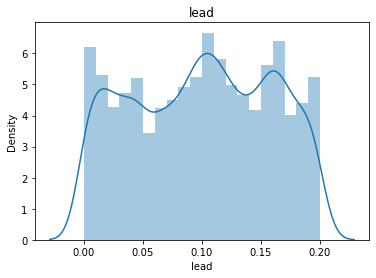

In [70]:
sns.distplot(df.lead)
plt.title('lead')

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'lead')

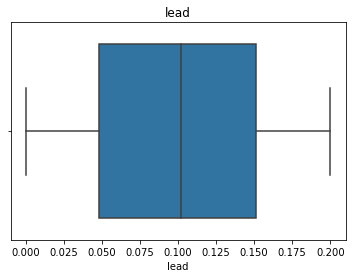

In [71]:
sns.boxplot(df.lead)
plt.title('lead')

In [72]:
annova=ols('lead ~is_safe',data=df).fit()
an=sm.stats.anova_lm(annova)
print(an.round(decimals=5))

              df    sum_sq  mean_sq        F   PR(>F)
is_safe      1.0   0.00269  0.00269  0.79463  0.37273
Residual  7994.0  27.04899  0.00338      NaN      NaN


In [73]:
df.drop(['lead'],axis=1,inplace=True)

In [74]:
df.nitrates.value_counts()

8.32     20
10.90    19
14.66    18
4.94     17
11.36    16
         ..
12.99     1
7.95      1
14.18     1
18.56     1
0.00      1
Name: nitrates, Length: 1803, dtype: int64

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'nitrates')

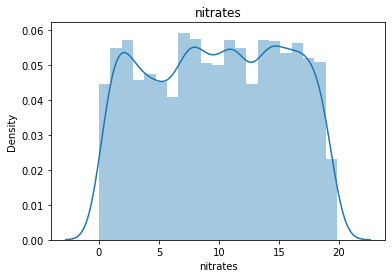

In [75]:
sns.distplot(df.nitrates)
plt.title('nitrates')

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'nitrates')

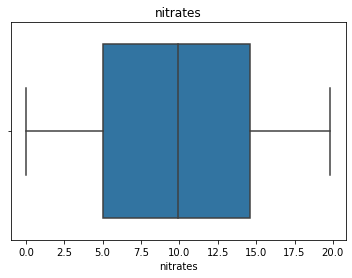

In [76]:
sns.boxplot(df.nitrates)
plt.title('nitrates')

In [77]:
annova=ols('nitrates ~is_safe',data=df).fit()
an=sm.stats.anova_lm(annova)
print(an.round(decimals=5))

              df        sum_sq     mean_sq         F  PR(>F)
is_safe      1.0    1276.50923  1276.50923  41.77378     0.0
Residual  7994.0  244277.95887    30.55766       NaN     NaN


In [78]:
df.nitrites.value_counts()

1.20    89
1.27    78
1.36    78
1.37    74
1.95    74
        ..
2.83     1
2.62     1
2.92     1
2.64     1
2.93     1
Name: nitrites, Length: 280, dtype: int64

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'nitrites')

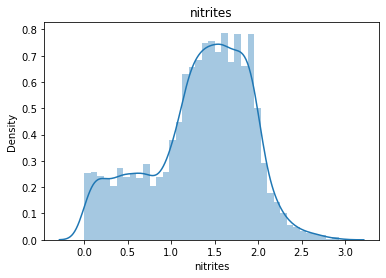

In [79]:
sns.distplot(df.nitrites)
plt.title('nitrites')

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'nitrites')

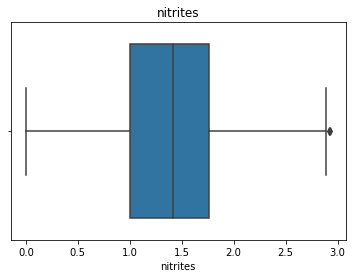

In [80]:
sns.boxplot(df.nitrites)
plt.title('nitrites')

In [81]:
annova=ols('nitrites ~is_safe',data=df).fit()
an=sm.stats.anova_lm(annova)
print(an.round(decimals=5))

              df      sum_sq  mean_sq         F   PR(>F)
is_safe      1.0     5.80065  5.80065  17.68735  0.00003
Residual  7994.0  2621.67166  0.32795       NaN      NaN


In [82]:
df.mercury.value_counts()

0.006    919
0.008    863
0.001    824
0.009    815
0.007    799
0.005    736
0.003    734
0.002    720
0.004    687
0.010    528
0.000    371
Name: mercury, dtype: int64

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'mercury')

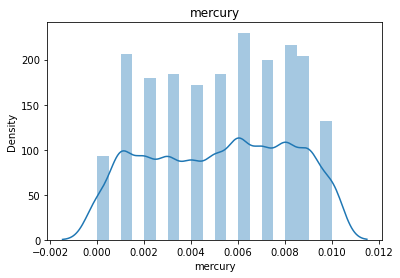

In [83]:
sns.distplot(df.mercury)
plt.title('mercury')

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'mercury')

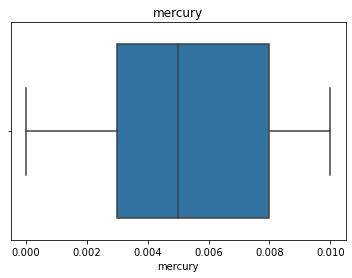

In [84]:
sns.boxplot(df.mercury)
plt.title('mercury')

In [85]:
annova=ols('mercury ~is_safe',data=df).fit()
an=sm.stats.anova_lm(annova)
print(an.round(decimals=5))

              df   sum_sq  mean_sq         F   PR(>F)
is_safe      1.0  0.00010  0.00010  10.85041  0.00099
Residual  7994.0  0.07029  0.00001       NaN      NaN


In [86]:
df.perchlorate.value_counts()

0.05     28
0.24     27
0.18     26
0.11     26
0.30     25
         ..
46.51     1
19.04     1
53.52     1
51.04     1
8.44      1
Name: perchlorate, Length: 2999, dtype: int64

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'perchlorate')

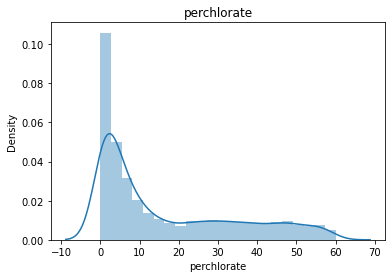

In [87]:
sns.distplot(df.perchlorate)
plt.title('perchlorate')

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'perchlorate')

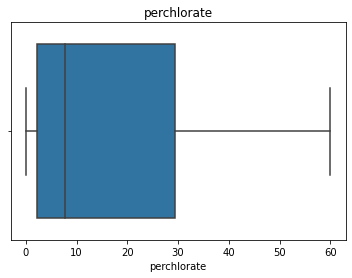

In [88]:
sns.boxplot(df.perchlorate)
plt.title('perchlorate')

In [89]:
annova=ols('perchlorate ~is_safe',data=df).fit()
an=sm.stats.anova_lm(annova)
print(an.round(decimals=5))

              df        sum_sq      mean_sq         F  PR(>F)
is_safe      1.0  1.434878e+04  14348.78143  46.11698     0.0
Residual  7994.0  2.487243e+06    311.13878       NaN     NaN


In [90]:
df.radium.value_counts()

0.06    41
0.25    37
0.15    36
0.53    35
0.74    35
        ..
6.73     1
4.46     1
5.74     1
3.98     1
6.22     1
Name: radium, Length: 735, dtype: int64

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'radium')

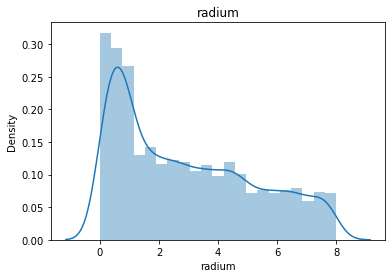

In [91]:
sns.distplot(df.radium)
plt.title('radium')

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'radium')

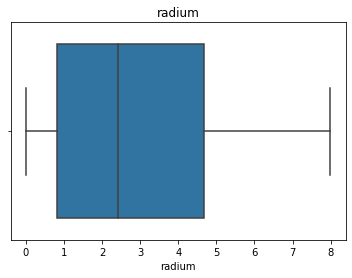

In [92]:
sns.boxplot(df.radium)
plt.title('radium')

In [93]:
annova=ols('radium ~is_safe',data=df).fit()
an=sm.stats.anova_lm(annova)
print(an.round(decimals=5))

              df       sum_sq    mean_sq         F  PR(>F)
is_safe      1.0    180.81445  180.81445  33.64942     0.0
Residual  7994.0  42955.59776    5.37348       NaN     NaN


In [94]:
df.selenium.value_counts()

0.06    927
0.05    871
0.02    838
0.07    823
0.03    799
0.09    760
0.01    760
0.04    736
0.08    679
0.00    403
0.10    400
Name: selenium, dtype: int64

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'selenium')

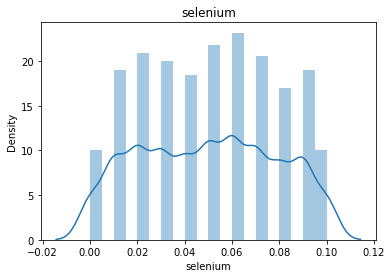

In [95]:
sns.distplot(df.selenium)
plt.title('selenium')

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'selenium')

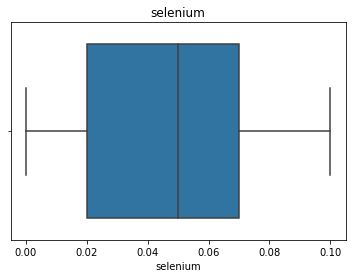

In [96]:
sns.boxplot(df.selenium)
plt.title('selenium')

In [97]:
annova=ols('selenium ~is_safe',data=df).fit()
an=sm.stats.anova_lm(annova)
print(an.round(decimals=5))

              df   sum_sq  mean_sq        F   PR(>F)
is_safe      1.0  0.00633  0.00633  7.65154  0.00569
Residual  7994.0  6.61277  0.00083      NaN      NaN


In [98]:
df.silver.value_counts()

0.04    503
0.03    501
0.06    499
0.01    498
0.05    485
0.09    482
0.07    472
0.02    457
0.08    454
0.10    248
0.00    246
0.42    124
0.12    120
0.18    112
0.21    100
0.20     96
0.27     96
0.11     96
0.24     96
0.33     92
0.13     92
0.37     92
0.49     88
0.16     84
0.45     84
0.35     84
0.41     80
0.44     80
0.40     80
0.28     76
0.15     76
0.23     76
0.17     76
0.31     76
0.48     76
0.47     76
0.38     72
0.36     72
0.26     72
0.34     71
0.39     68
0.19     68
0.32     64
0.29     64
0.46     64
0.22     60
0.25     60
0.30     56
0.43     52
0.14     44
0.50     36
Name: silver, dtype: int64

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'silver')

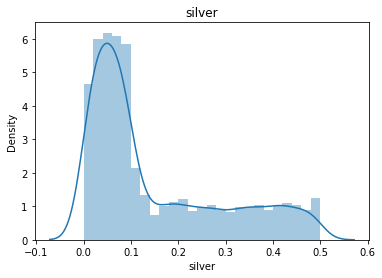

In [99]:
sns.distplot(df.silver)
plt.title('silver')

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'silver')

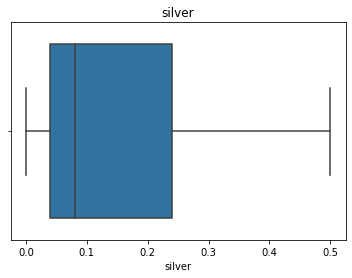

In [100]:
sns.boxplot(df.silver)
plt.title('silver')

In [101]:
annova=ols('silver ~is_safe',data=df).fit()
an=sm.stats.anova_lm(annova)
print(an.round(decimals=5))

              df     sum_sq  mean_sq         F  PR(>F)
is_safe      1.0    1.74194  1.74194  85.40312     0.0
Residual  7994.0  163.05076  0.02040       NaN     NaN


In [102]:
df.uranium.value_counts()

0.02    967
0.05    928
0.08    928
0.06    920
0.07    839
0.04    815
0.01    814
0.03    744
0.00    594
0.09    447
Name: uranium, dtype: int64

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'uranium')

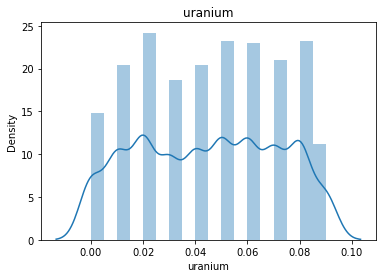

In [103]:
sns.distplot(df.uranium)
plt.title('uranium')

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'uranium')

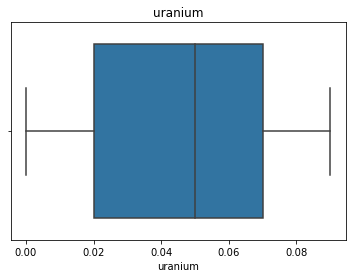

In [104]:
sns.boxplot(df.uranium)
plt.title('uranium')

In [105]:
annova=ols('uranium ~is_safe',data=df).fit()
an=sm.stats.anova_lm(annova)
print(an.round(decimals=5))

              df   sum_sq  mean_sq        F  PR(>F)
is_safe      1.0  0.03310  0.03310  45.9743     0.0
Residual  7994.0  5.75475  0.00072      NaN     NaN


In [106]:
df.is_safe.value_counts()

0    7084
1     912
Name: is_safe, dtype: int64

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7996 entries, 0 to 7998
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   object 
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   bacteria     7996 non-null   float64
 9   viruses      7996 non-null   float64
 10  nitrates     7996 non-null   float64
 11  nitrites     7996 non-null   float64
 12  mercury      7996 non-null   float64
 13  perchlorate  7996 non-null   float64
 14  radium       7996 non-null   float64
 15  selenium     7996 non-null   float64
 16  silver       7996 non-null   float64
 17  uranium      7996 non-null   float64
 18  is_safe      7996 non-null   object 
dtypes: flo

In [108]:
df['is_safe']=df['is_safe'].astype(int)

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7996 entries, 0 to 7998
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   object 
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   bacteria     7996 non-null   float64
 9   viruses      7996 non-null   float64
 10  nitrates     7996 non-null   float64
 11  nitrites     7996 non-null   float64
 12  mercury      7996 non-null   float64
 13  perchlorate  7996 non-null   float64
 14  radium       7996 non-null   float64
 15  selenium     7996 non-null   float64
 16  silver       7996 non-null   float64
 17  uranium      7996 non-null   float64
 18  is_safe      7996 non-null   int32  
dtypes: flo

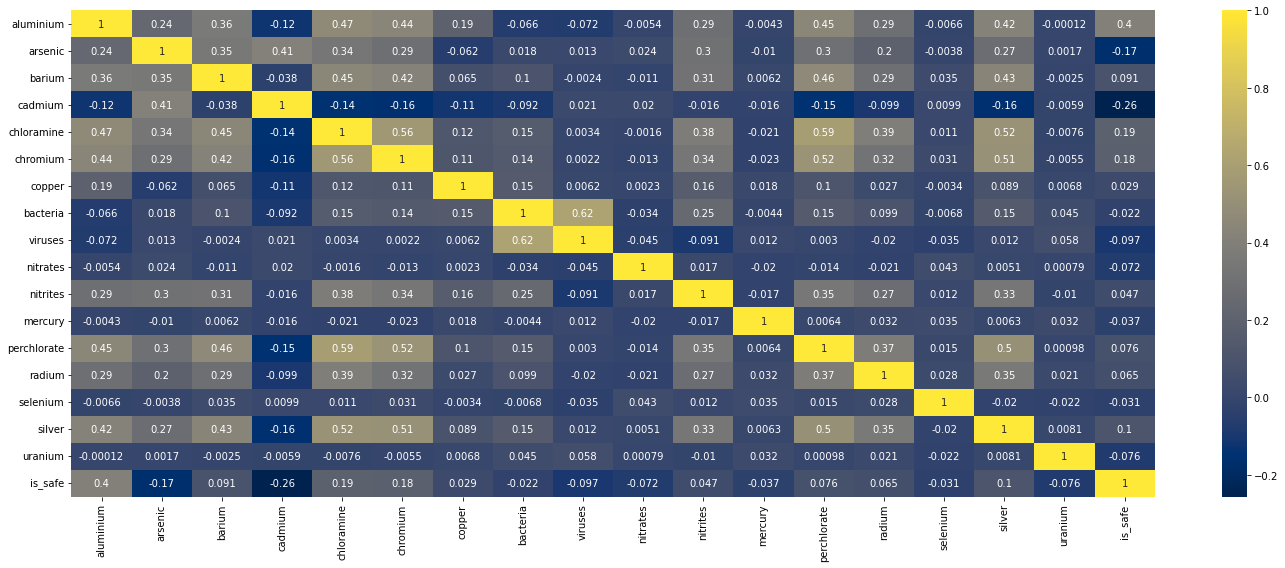

In [110]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),cmap='cividis',annot=True)
plt.tight_layout()

In [111]:
x=df.iloc[:,[0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]]
#x=df.iloc[:,[:-1]]

In [112]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=pd.DataFrame()
vif_data['feature']=x.columns

In [113]:
vif_data['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]


In [114]:
print(vif_data)

        feature       VIF
0     aluminium  2.654909
1       arsenic  3.829713
2        barium  3.962613
3       cadmium  3.243374
4    chloramine  3.514319
5      chromium  3.270963
6        copper  2.680142
7      bacteria  4.078452
8       viruses  3.115750
9      nitrates  3.611399
10     nitrites  8.187447
11      mercury  3.591854
12  perchlorate  3.555082
13       radium  3.255096
14     selenium  3.574176
15       silver  3.534637
16      uranium  3.356238


# MODELS

# SPLIITING THE MODELS

In [115]:
x=df.loc[:,df.columns!='is_safe']
y=df.loc[:,df.columns=='is_safe']

In [116]:
y

,is_safe
0,1
1,1
2,0
3,1
4,1
...,...
7994,1
7995,1
7996,1
7997,1


In [117]:
from sklearn.model_selection import train_test_split

In [118]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=44)

In [119]:
from sklearn.linear_model import LogisticRegression

In [120]:
log=LogisticRegression(solver='liblinear',random_state=0)
log.fit(x_train,y_train)
log.intercept_
log.coef_

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[ 6.06602319, -0.02853976, -8.36912372,  0.03157977, -4.90569541,
         0.1297039 ,  0.8292496 , -0.45069674,  1.18970975, -1.46866658,
        -0.05279184, -0.47850365, -0.1259702 , -0.03282169, -0.07814189,
        -1.32335073, -1.60588307, -2.89205647]])

In [121]:
# predictions
y_pred=log.predict(x_test)
print(len(y_pred))

1600


# confusion matrix

In [122]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test,y_pred)
print(cm)

[[1423   13]
 [  85   79]]


# accuracy score

In [123]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.93875

# classification report

In [124]:
from sklearn.metrics import classification_report

In [125]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1436
           1       0.86      0.48      0.62       164

    accuracy                           0.94      1600
   macro avg       0.90      0.74      0.79      1600
weighted avg       0.93      0.94      0.93      1600



# ROC curve and AUC curve

In [126]:
from sklearn.metrics import roc_curve,auc,roc_auc_score

In [127]:
y_pred_prob=log.predict_proba(x)
fpr,tpr,thresholds=roc_curve(df['is_safe'],y_pred_prob[:,1])
roc_auc=auc(fpr,tpr)
print(roc_auc)

0.8793368983228822


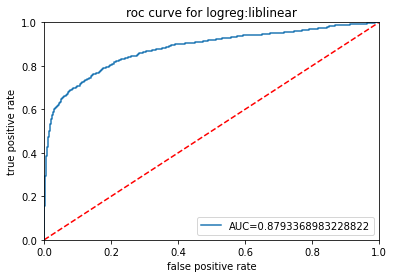

In [128]:
# roc curve
plt.title('roc curve for logreg:liblinear')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(fpr,tpr,label='AUC='+str(roc_auc))
plt.legend(loc=4)
plt.show()

# SMOTE

In [129]:
df.is_safe.value_counts()

0    7084
1     912
Name: is_safe, dtype: int64

In [130]:
nosafe=df[df.is_safe==0]
safe=df[df.is_safe==1]

In [131]:
from sklearn.utils import resample

In [132]:
safe_oversample=resample(safe,
                        replace=True,
                        n_samples=len(nosafe),
                        random_state=27)

In [133]:
#combine majority and oversampled minority
df=pd.concat([nosafe,safe_oversample])
df.is_safe.value_counts()

0    7084
1    7084
Name: is_safe, dtype: int64

In [134]:
x=df.loc[:,df.columns!='is_safe']
y=df.loc[:,df.columns=='is_safe']

In [135]:
from sklearn.linear_model import LogisticRegression

In [136]:
log1=LogisticRegression(solver='liblinear',random_state=0)
log1.fit(x_train,y_train)
log1.intercept_
log1.coef_

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[ 6.06602319, -0.02853976, -8.36912372,  0.03157977, -4.90569541,
         0.1297039 ,  0.8292496 , -0.45069674,  1.18970975, -1.46866658,
        -0.05279184, -0.47850365, -0.1259702 , -0.03282169, -0.07814189,
        -1.32335073, -1.60588307, -2.89205647]])

In [137]:
# predictions
y_pred2=log1.predict(x_test)
len(y_pred2)

1600

In [138]:
from sklearn import metrics
cm1=metrics.confusion_matrix(y_test, y_pred2)
print(cm1)

[[1423   13]
 [  85   79]]


In [139]:
# accuracy score

In [140]:
log1.score(x_test,y_test)

0.93875

# classification report

In [141]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1436
           1       0.86      0.48      0.62       164

    accuracy                           0.94      1600
   macro avg       0.90      0.74      0.79      1600
weighted avg       0.93      0.94      0.93      1600



# roc curve and auc 

In [142]:
y_pred_prob=log1.predict_proba(x)
fpr,tpr,thresholds=roc_curve(df['is_safe'],y_pred_prob[:,1])
roc_auc=auc(fpr,tpr)
print(roc_auc)

0.8757782905847742


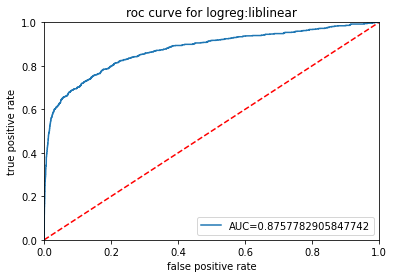

In [143]:
plt.title('roc curve for logreg:liblinear')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(fpr,tpr,label='AUC='+str(roc_auc))
plt.legend(loc=4)
plt.show()


# standard scaling

In [144]:
from sklearn.preprocessing import StandardScaler

In [145]:
scaler = StandardScaler()
x= scaler.fit_transform(x)

# DESCISON TREE CLASSIFIER 

In [146]:
#fit tree

In [147]:
from sklearn.model_selection import train_test_split

In [148]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=44)

In [149]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree



In [150]:
regr=DecisionTreeClassifier()

In [151]:
regr.fit(x_train,y_train)

DecisionTreeClassifier()

In [152]:
# predict/estimate train and xtrain 
test_train=regr.predict(x_train)

In [153]:
# see train 
from sklearn import tree 

[Text(0.6361272673501577, 0.9821428571428571, 'X[4] <= -0.633\ngini = 0.5\nsamples = 11334\nvalue = [5694, 5640]'),
 Text(0.35269617507886436, 0.9464285714285714, 'X[0] <= -0.578\ngini = 0.345\nsamples = 5561\nvalue = [1230, 4331]'),
 Text(0.11514195583596215, 0.9107142857142857, 'X[17] <= -0.269\ngini = 0.409\nsamples = 1143\nvalue = [815, 328]'),
 Text(0.06309148264984227, 0.875, 'X[16] <= -0.407\ngini = 0.499\nsamples = 579\nvalue = [299, 280]'),
 Text(0.04100946372239748, 0.8392857142857143, 'X[5] <= -0.989\ngini = 0.395\nsamples = 321\nvalue = [87, 234]'),
 Text(0.03470031545741325, 0.8035714285714286, 'gini = 0.0\nsamples = 49\nvalue = [49, 0]'),
 Text(0.0473186119873817, 0.8035714285714286, 'X[14] <= 0.801\ngini = 0.24\nsamples = 272\nvalue = [38, 234]'),
 Text(0.04100946372239748, 0.7678571428571429, 'X[15] <= 0.915\ngini = 0.174\nsamples = 259\nvalue = [25, 234]'),
 Text(0.025236593059936908, 0.7321428571428571, 'X[5] <= -0.869\ngini = 0.095\nsamples = 240\nvalue = [12, 228]')

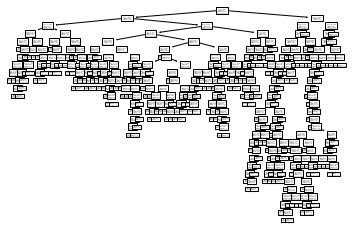

In [154]:
tree.plot_tree(regr.fit(x_train,y_train))

# TRAIN DATA 

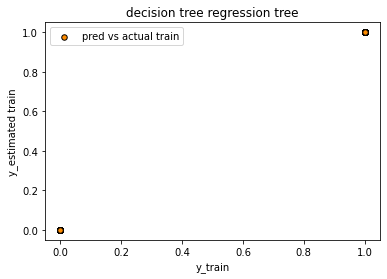

In [155]:
plt.figure()
plt.scatter(y_train,test_train,s=30,edgecolor='black',
           c='darkorange',label='pred vs actual train')
plt.xlabel('y_train')
plt.ylabel('y_estimated train')
plt.title('decision tree regression tree')
plt.legend()
plt.show()

# RANDOM SEARCH(RANDOM FOREST)

In [156]:
from sklearn.model_selection import train_test_split

In [157]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=44)

In [158]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier

In [159]:
model_params={
    'n_estimators':[50,150,250],
    'max_features':['sqrt',0.25,0.5,0,75,1.0],
    'min_samples_split':[2,4,6]
}

In [160]:
#model building with grid search
# define rf 
rf_model=RandomForestClassifier(random_state=1)
rf_model.fit(x_train,y_train)

C:\Users\Bhuvaneshvaran k\AppData\Local\Temp\ipykernel_16396\2975544097.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(x_train,y_train)


RandomForestClassifier(random_state=1)

In [161]:
#set up grid search
clf=RandomizedSearchCV(rf_model,model_params,cv=5)

In [162]:
from sklearn.model_selection import RandomizedSearchCV
search = RandomizedSearchCV(rf_model,model_params,cv = 10,random_state = 8)
search.fit(x_train,y_train)

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680:

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=1),
                   param_distributions={'max_features': ['sqrt', 0.25, 0.5, 0,
                                                         75, 1.0],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [50, 150, 250]},
                   random_state=8)

In [163]:
est=search.best_estimator_

In [164]:
rf_model1=est.fit(x_train,y_train)

C:\Users\Bhuvaneshvaran k\AppData\Local\Temp\ipykernel_16396\2785416181.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model1=est.fit(x_train,y_train)


In [165]:
y_pred=rf_model1.predict(x_test)

In [166]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,auc,roc_auc_score

In [167]:
accuracy_score(y_pred,y_test)

0.9865913902611151

In [168]:
print(confusion_matrix(y_pred,y_test))

[[1352    0]
 [  38 1444]]


In [169]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1352
           1       1.00      0.97      0.99      1482

    accuracy                           0.99      2834
   macro avg       0.99      0.99      0.99      2834
weighted avg       0.99      0.99      0.99      2834



In [170]:
roc_auc_score(y_pred,y_test)

0.9871794871794872

In [171]:
y_pred_prob = rf_model1.predict_proba(x_test)
fpr,tpr,threshold = roc_curve(y_test,y_pred_prob[:,1])
roc_auc = auc(fpr,tpr)
roc_auc

0.9999285059487036

# ADABOOSTING

In [172]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=44)

In [173]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [174]:
ada = AdaBoostClassifier()
params = {'n_estimators':range(1,250)}

In [175]:
from sklearn.model_selection import RandomizedSearchCV

In [176]:
search=RandomizedSearchCV(ada,params,cv=10)

In [177]:
search.fit(x_train,y_train)

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

RandomizedSearchCV(cv=10, estimator=AdaBoostClassifier(),
                   param_distributions={'n_estimators': range(1, 250)})

In [178]:
search.best_estimator_

AdaBoostClassifier(n_estimators=227)

In [179]:
dtree = DecisionTreeClassifier(criterion= 'gini', max_depth = None)
ada2 = AdaBoostClassifier(dtree,n_estimators=222)

In [180]:
model_ada=ada2.fit(x_train,y_train)

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [181]:
y_pred=ada2.fit(x_train,y_train)

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [182]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,auc,roc_auc_score

# SVM(Support vector machine)

In [186]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=44)

In [187]:
from sklearn import svm

In [188]:
svc = svm.SVC(class_weight='balanced', probability=True)
model_svc = svc.fit(x_train,y_train)
model_svc.get_params()

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': 'balanced',
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [189]:
y_pred = model_svc.predict(x_test)
len(y_pred)

2834

In [190]:
accuracy_score(y_test,y_pred)

0.9573041637261821

In [191]:
print(confusion_matrix(y_test,y_pred))

[[1293   97]
 [  24 1420]]


In [192]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96      1390
           1       0.94      0.98      0.96      1444

    accuracy                           0.96      2834
   macro avg       0.96      0.96      0.96      2834
weighted avg       0.96      0.96      0.96      2834



In [193]:
roc_auc_score(y_test,y_pred)

0.9567976643615856

# KNN (K NEAREST NEIGHBOUR)

In [194]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=13)
print(knn)
mpm_knn=knn.fit(x_train,y_train)
print(mpm_knn)

KNeighborsClassifier(n_neighbors=13)
KNeighborsClassifier(n_neighbors=13)


C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [195]:
#Applying on Test data for prediction
y_pred = mpm_knn.predict(x_test)
print(y_pred)

[0 1 1 ... 1 1 1]


In [196]:
# prediction score
mpm_knn.score(x_test,y_test)

0.8835568101623148

In [197]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8835568101623148

In [198]:
# find optimal number of n neighbors
error_rate=[]

# NAVIEBAYES 

In [199]:
from sklearn.model_selection import train_test_split

In [200]:
x_tarin,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=8)

In [201]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
model=gnb.fit(x_train,y_train)
model

C:\Users\Bhuvaneshvaran k\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [202]:
y_pred=model.predict(x_test)


In [203]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [204]:
confusion_matrix(y_pred,y_test)

array([[578, 968],
       [812, 476]], dtype=int64)

In [205]:
print(classification_report(y_pred,y_test))


              precision    recall  f1-score   support

           0       0.42      0.37      0.39      1546
           1       0.33      0.37      0.35      1288

    accuracy                           0.37      2834
   macro avg       0.37      0.37      0.37      2834
weighted avg       0.38      0.37      0.37      2834



In [206]:
print(accuracy_score(y_test,y_pred)*100)

37.191249117854625
